In [5]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [2]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

load_raw_to_epochs('esn.bdf', True)

Extracting EDF parameters from C:\Users\Alberto\Documents\BCI\data\esn\esn.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6273023  =      0.000 ...  3063.000 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)



C:\Users\Alberto\Documents\BCI\data\esn\../../preprocessing\load_data.py:35: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The required channels are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:   33.2s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   34.7s finished


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
104 events found
Event IDs: [  2   4 130 134 255]
Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 104 events and 20481 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1016 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 3896 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 7388 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done 7592 out of 7592 | elapsed:   10.6s finished


Overwriting existing file.
saved


In [8]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\esn\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 7288 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 8568 out of 8568 | elapsed:    8.1s finished


Using matplotlib as 2D backend.


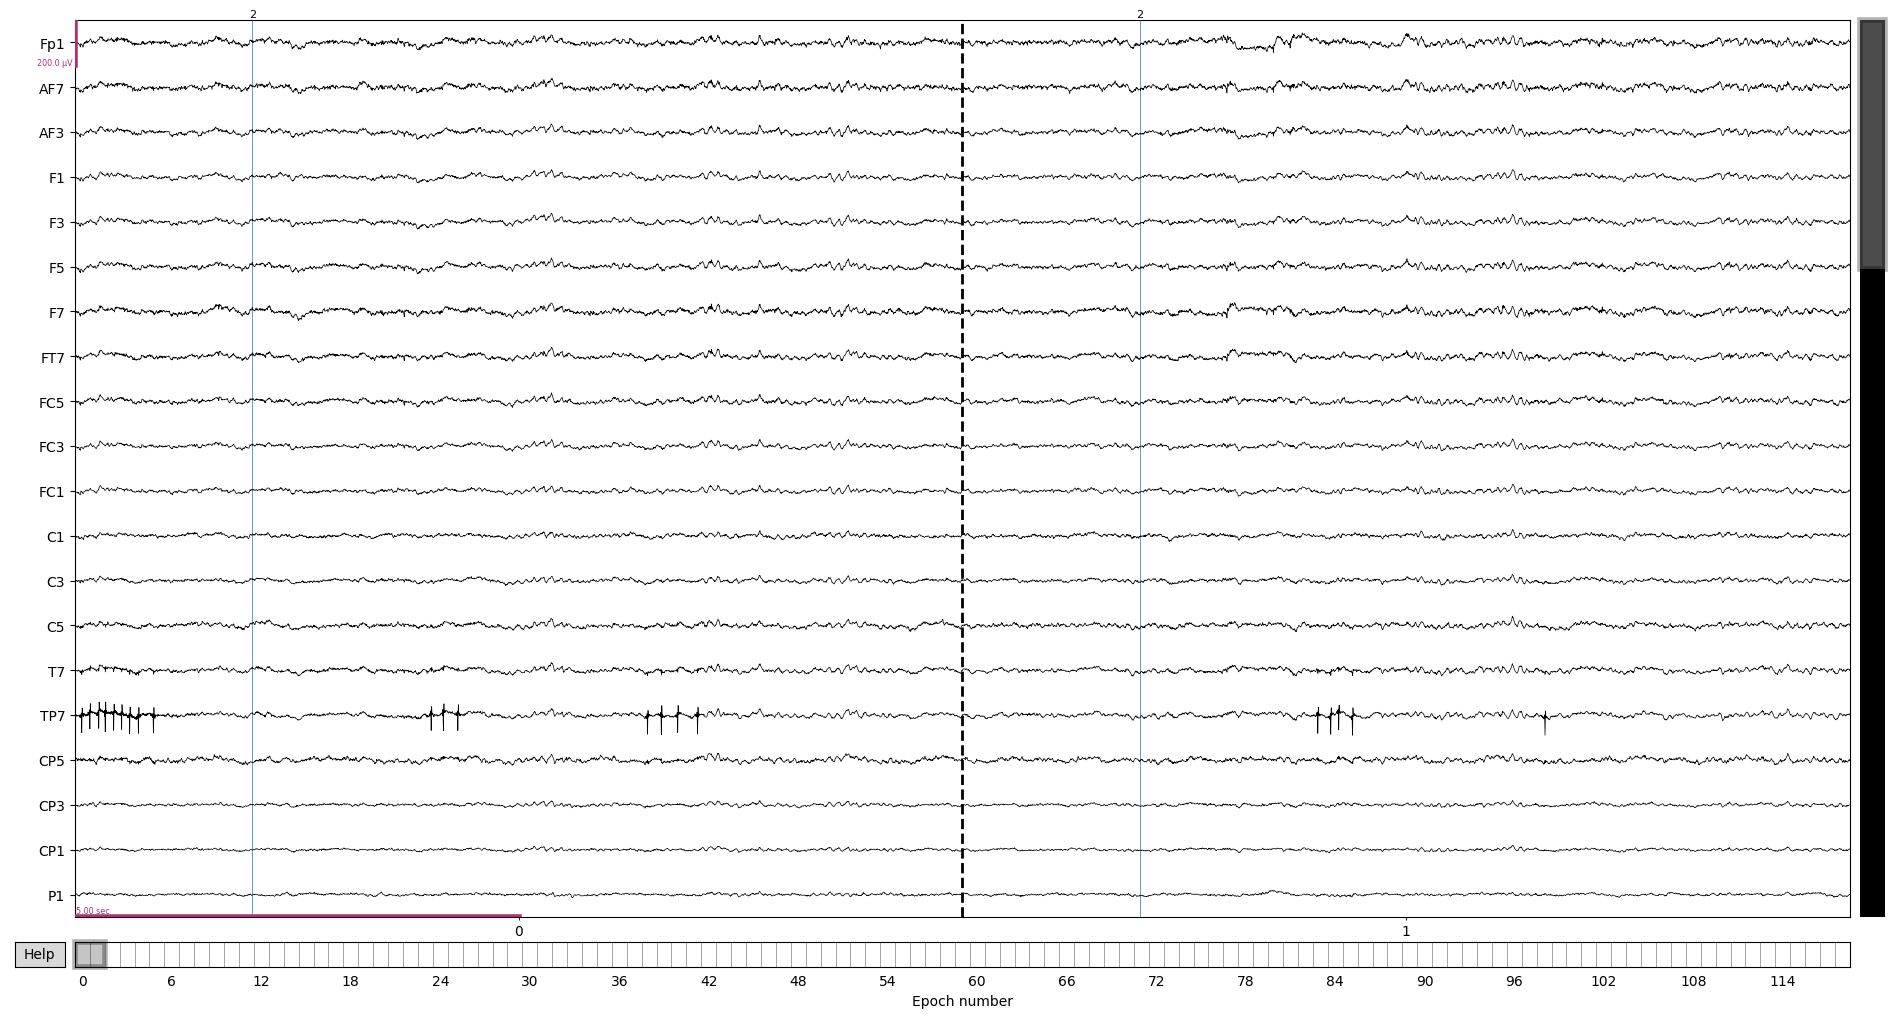

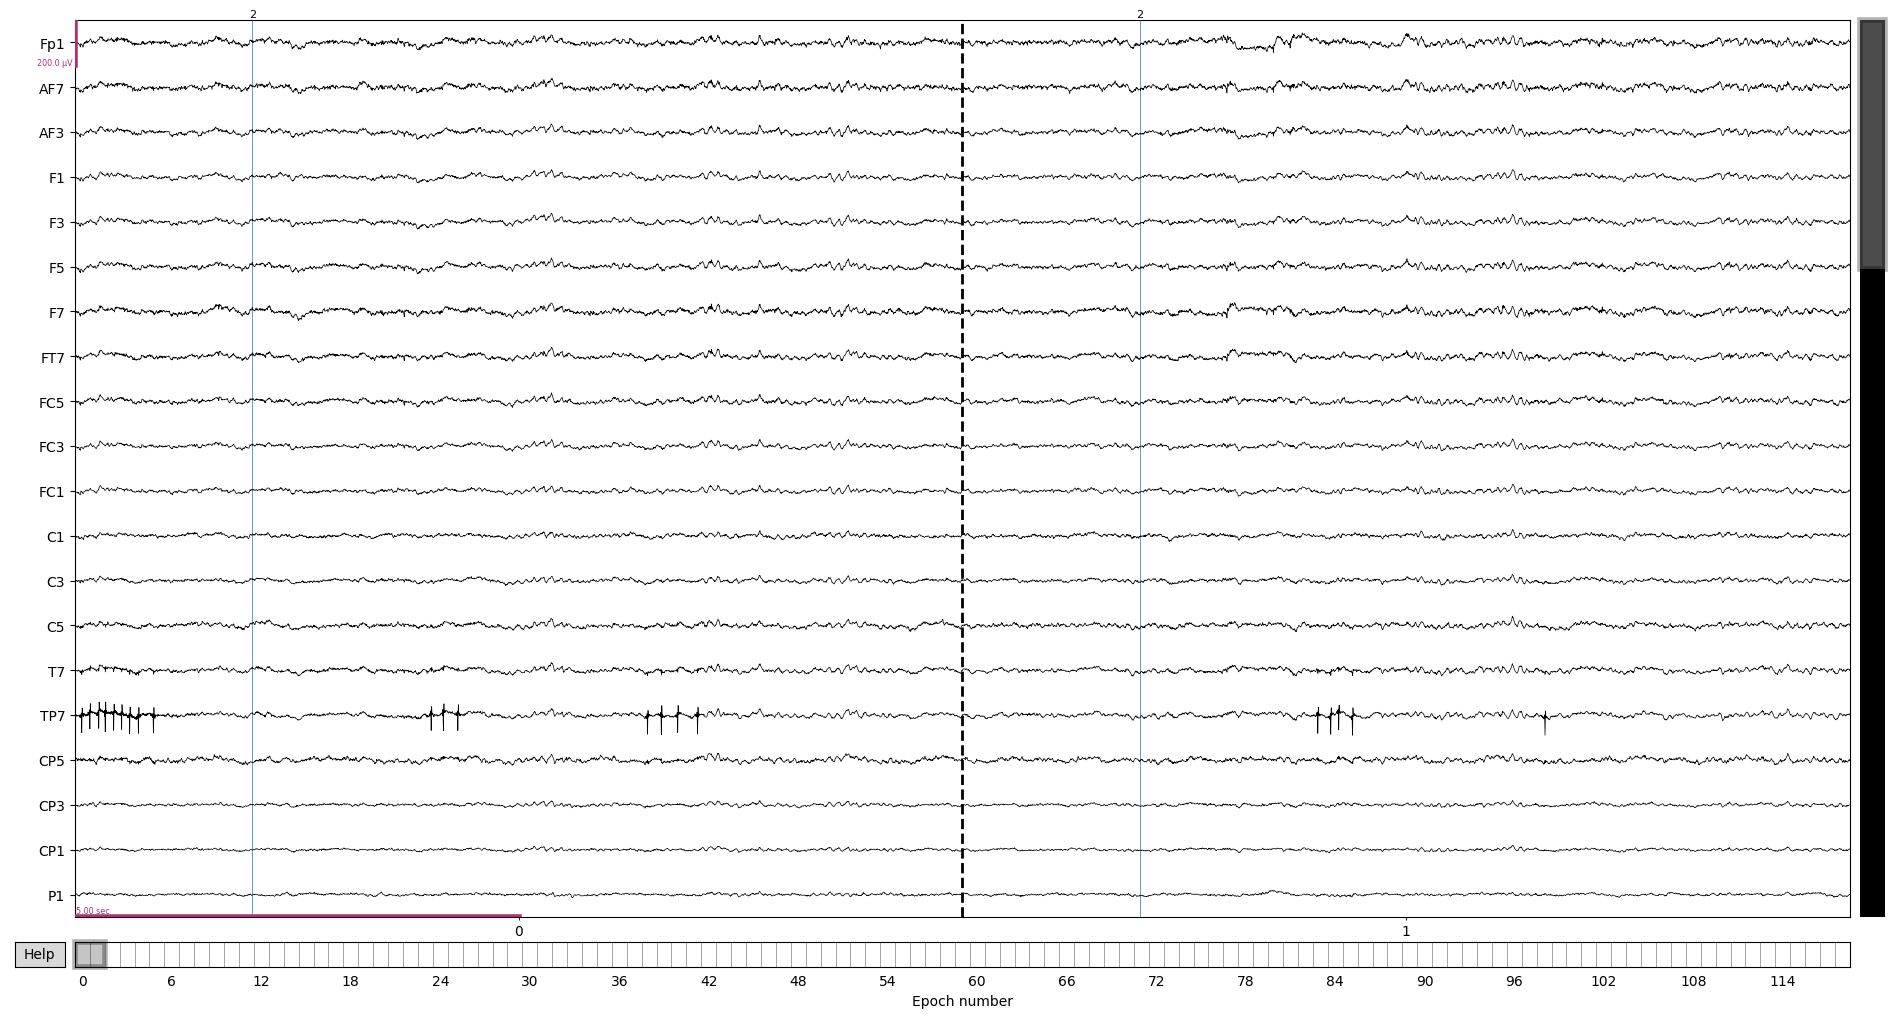

In [4]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-5, events=raw.events, picks=['eeg','eog'])

Marking bad chanels

In [9]:
bads = ['EXG7', 'EXG5','T8']
raw.info['bads'] = bads

Referencing

In [10]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [11]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  104 events (all good), -2 - 7.99902 sec, baseline off, ~593.2 MB, data loaded,
 'r_pinch': 20
 'r_stop': 20
 'left': 20
 'right': 20
 'rest': 24>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 6934 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 7616 out of 7616 | elapsed:    7.0s finished


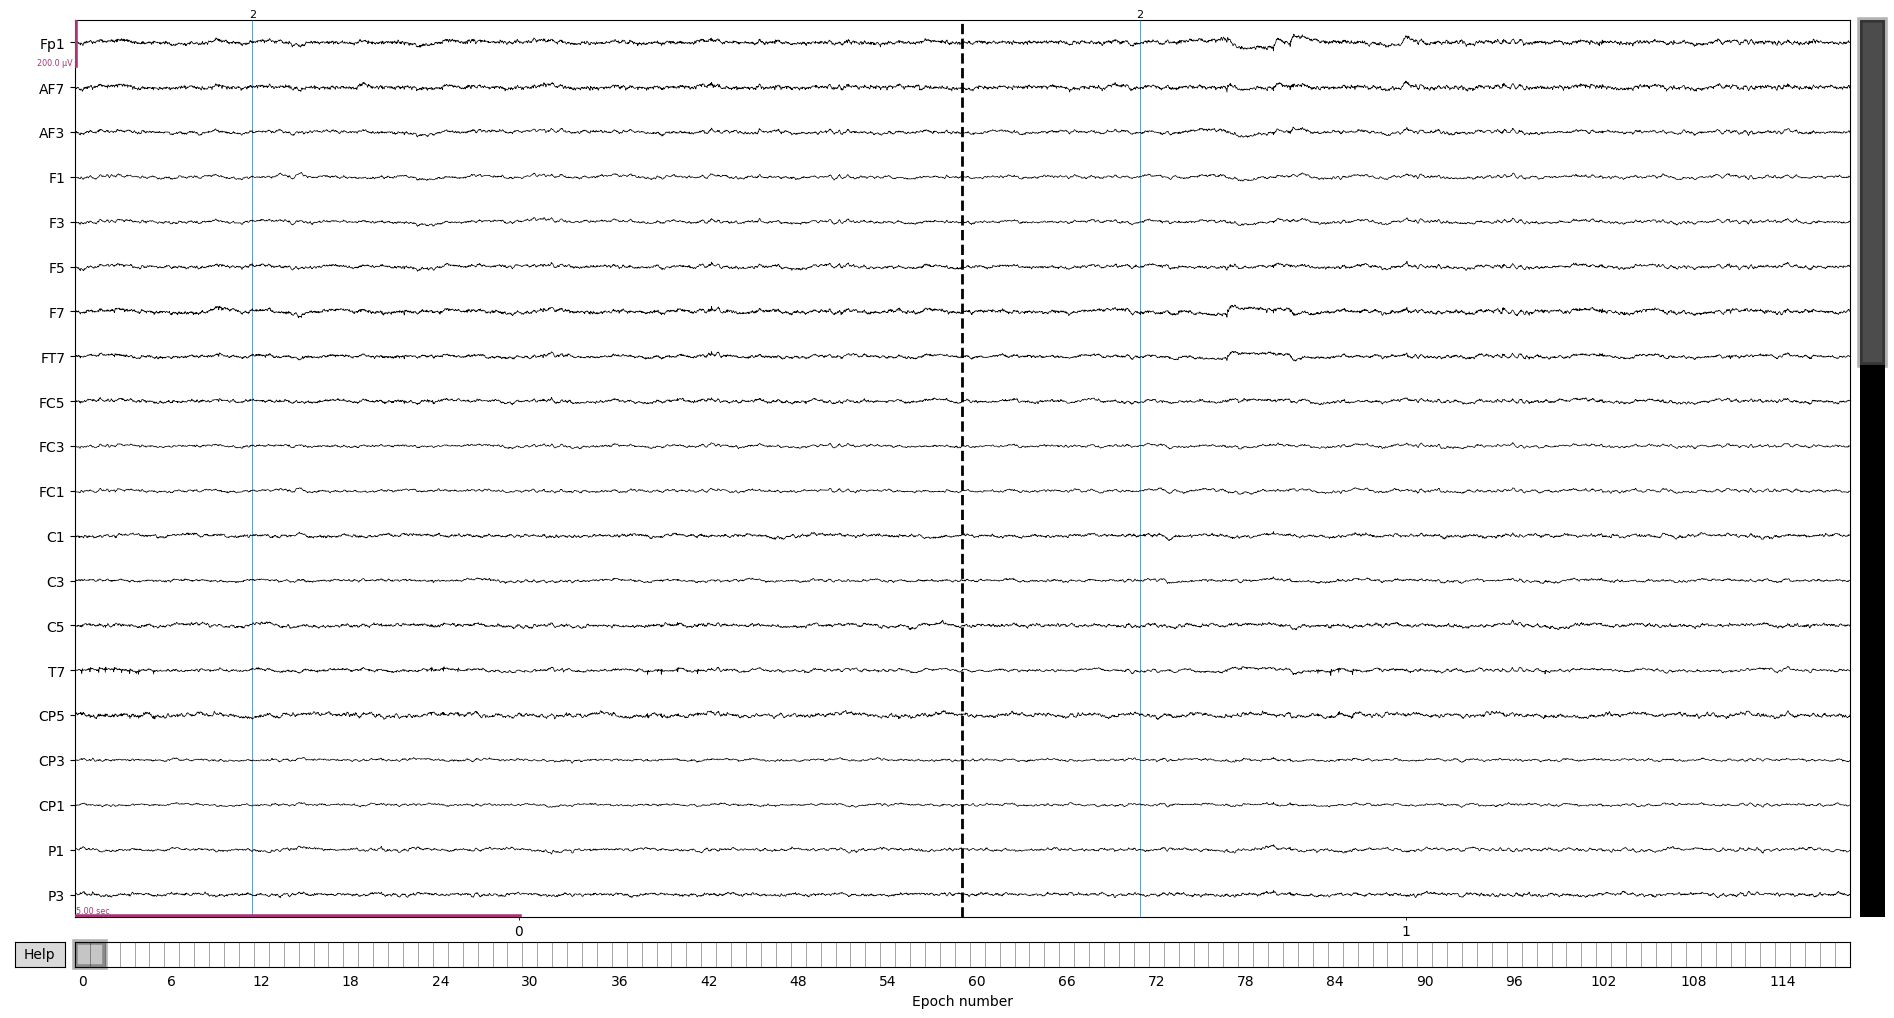

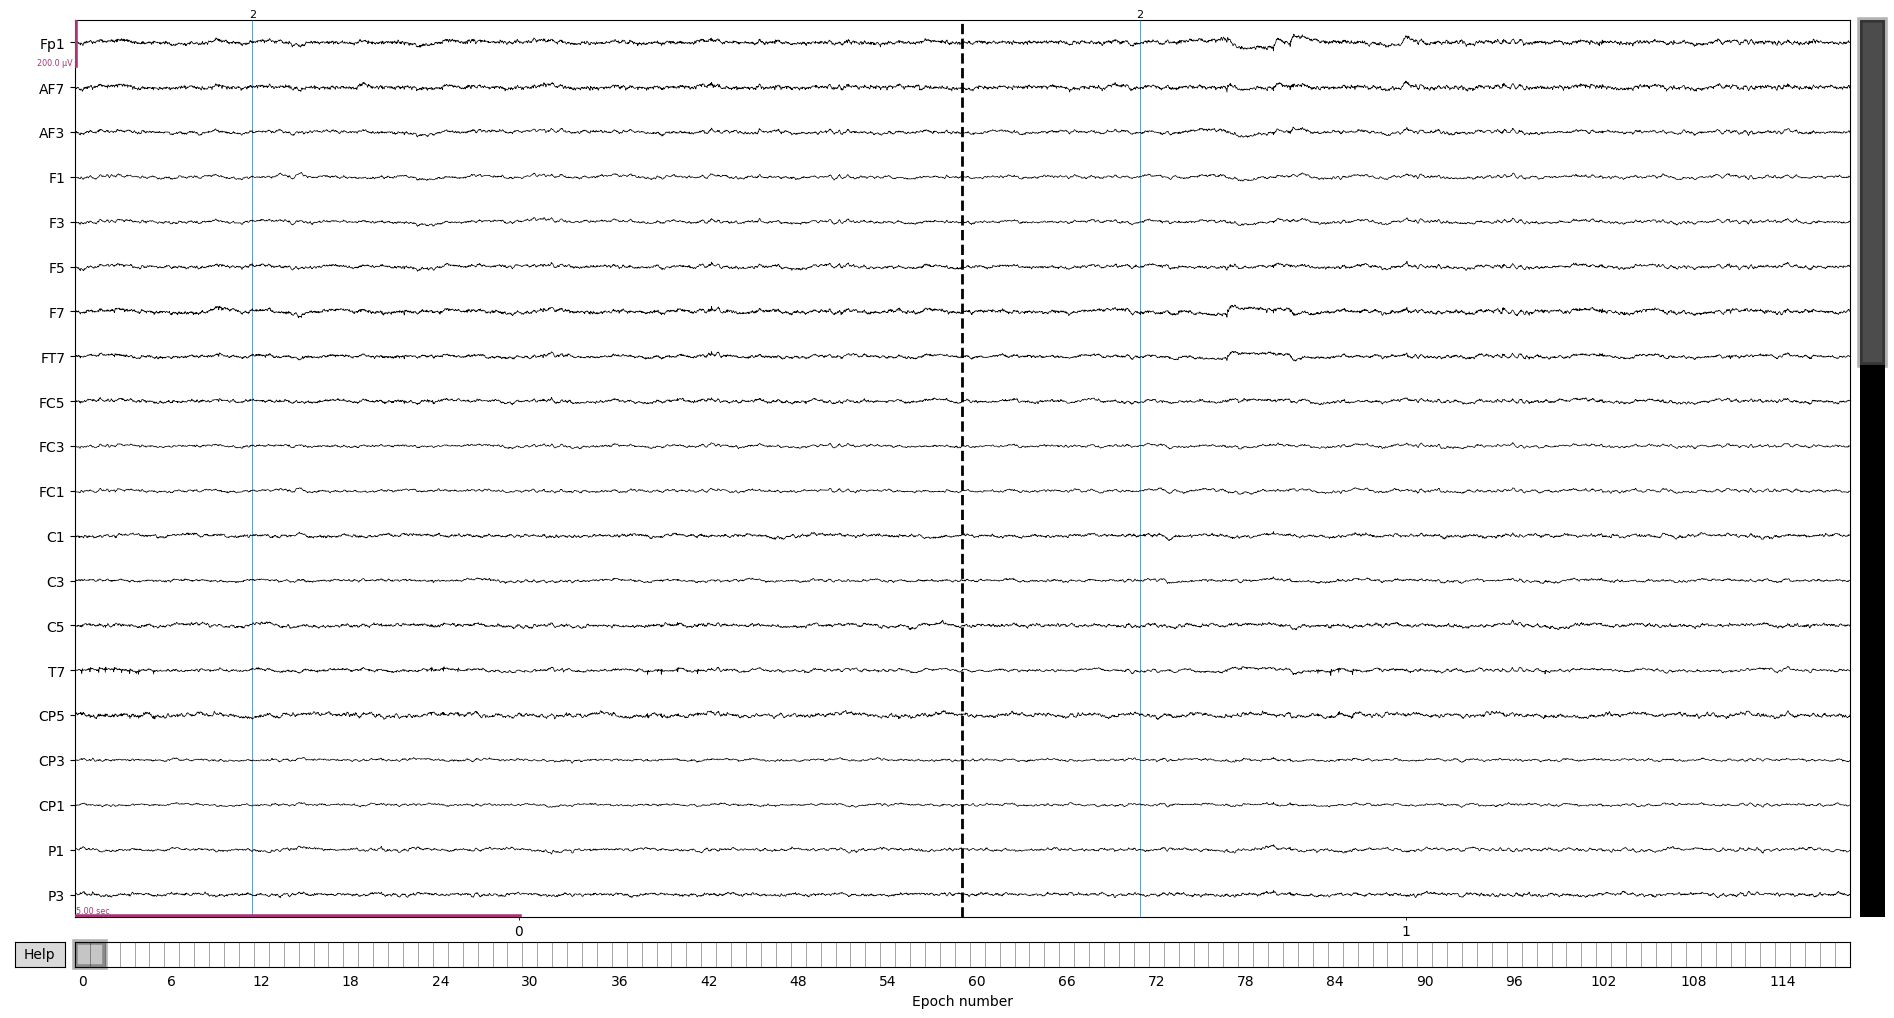

In [8]:
referenced.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-6, events=referenced.events, picks=['eeg','eog'])

In [12]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

Overwriting existing file.


REMOVE ARTIFACTS


In [3]:
epochs = read_epochs('referenced_epo.fif')
epochs.drop([0, 3, 6, 8, 14, 16,19, 20, 23,25, 26, 27,30, 33,35,36, 37, 39,40,48, 49, 50, 56,57, 60, 65, 66, 71, 72, 73, 78, 80, 84, 86, 88,89, 90, 91, 93, 94,95, 102])

Reading C:\Users\Alberto\Documents\BCI\data\esn\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated
Dropped 42 epochs: 0, 3, 6, 8, 14, 16, 19, 20, 23, 25, 26, 27, 30, 33, 35, 36, 37, 39, 40, 48, 49, 50, 56, 57, 60, 65, 66, 71, 72, 73, 78, 80, 84, 86, 88, 89, 90, 91, 93, 94, 95, 102


<EpochsFIF |  62 events (all good), -2 - 7.99902 sec, baseline off, ~353.7 MB, data loaded,
 'r_pinch': 7
 'r_stop': 16
 'left': 14
 'right': 14
 'rest': 11>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


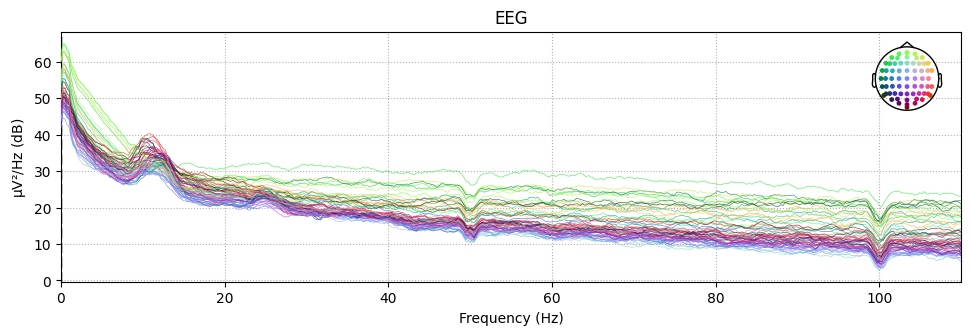

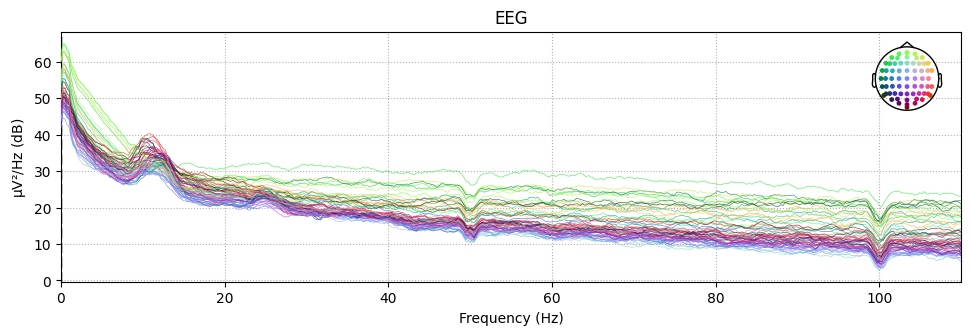

In [14]:
epochs['left'].plot_psd(fmax=110, tmin=0, tmax=4)

EOG Regression

No projector specified for this dataset. Please consider the method self.add_proj.


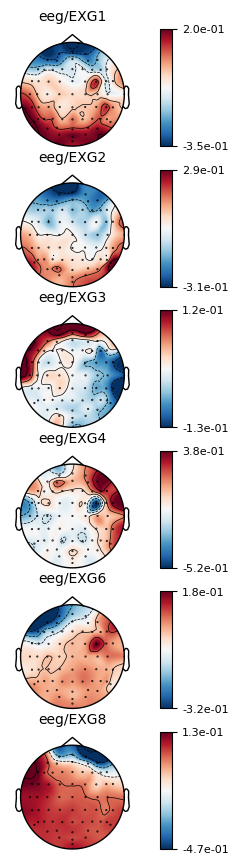

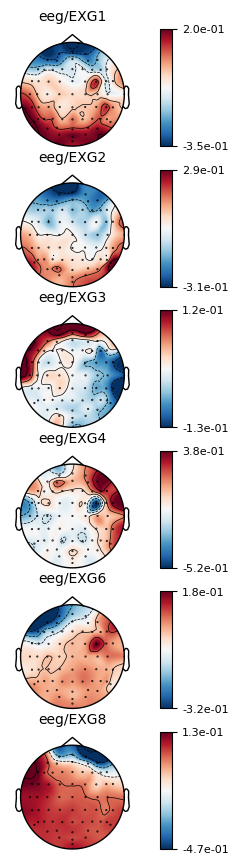

In [6]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8']).fit(epochs)
regressor.plot()

ICA

In [11]:
filtered = epochs.copy().filter(1,120, n_jobs=8)
filtered.apply_baseline((-1.4,-0.1))
filtered.crop(-0.5,2)
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 3808 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 3968 out of 3968 | elapsed:    3.5s finished


Applying baseline correction (mode: mean)
Fitting ICA to data using 63 channels (please be patient, this may take a while)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_6316\79998668.py:5: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(filtered)


Selecting by number: 10 components
Fitting ICA took 5.4s.


<ICA | epochs decomposition, method: picard (fit in 34 iterations on 158782 samples), 10 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

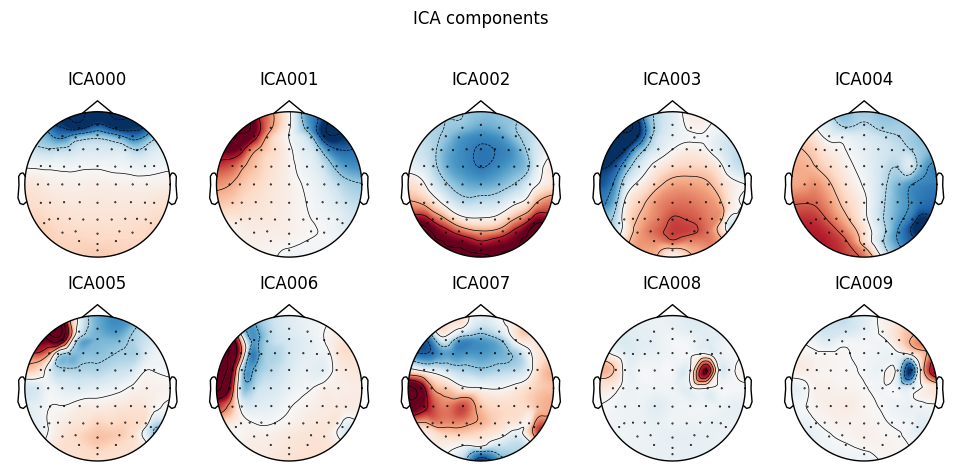

[<MNEFigure size 975x496 with 10 Axes>]

In [12]:
plot_ica_components(ica)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_6316\1715540231.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (3073), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-1,2).filter(1,120, verbose=False),


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
28 matching events found
No baseline correction applied
0 projection i

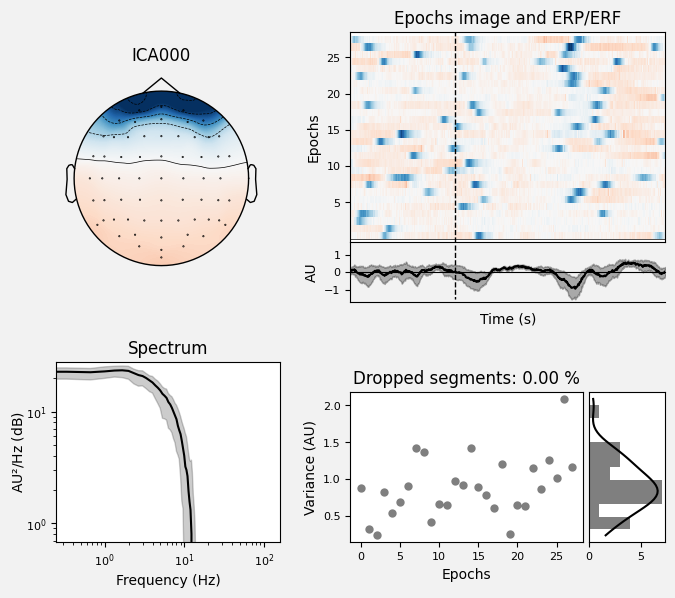

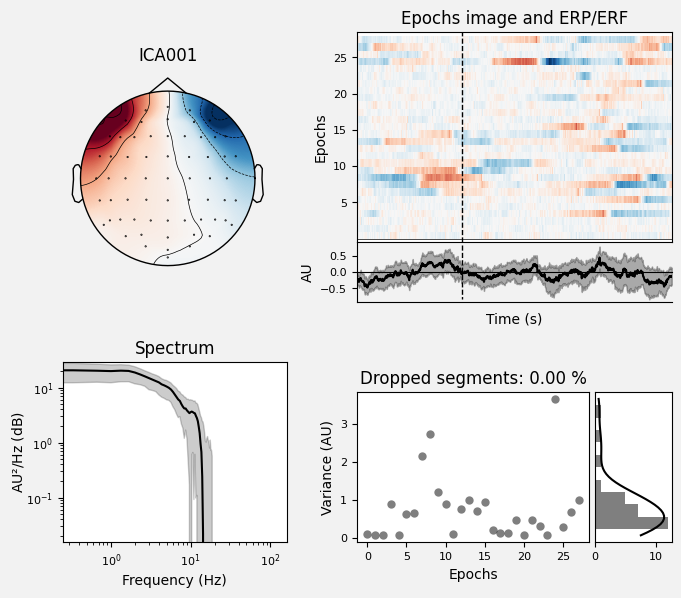

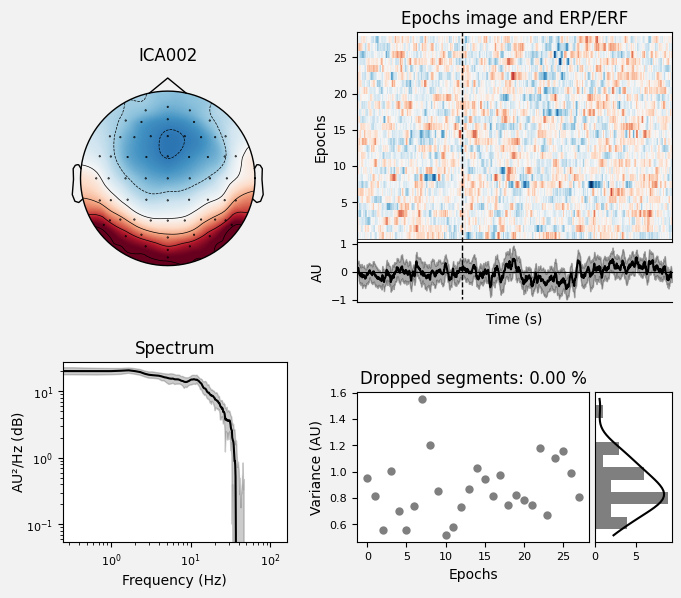

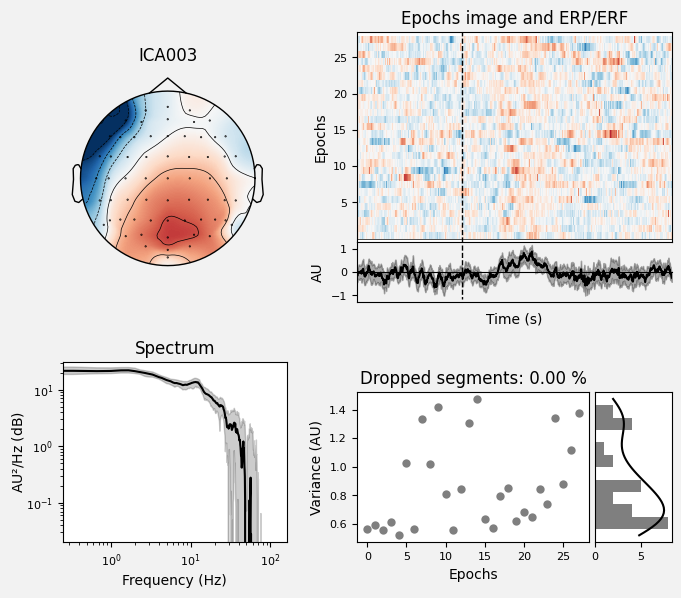

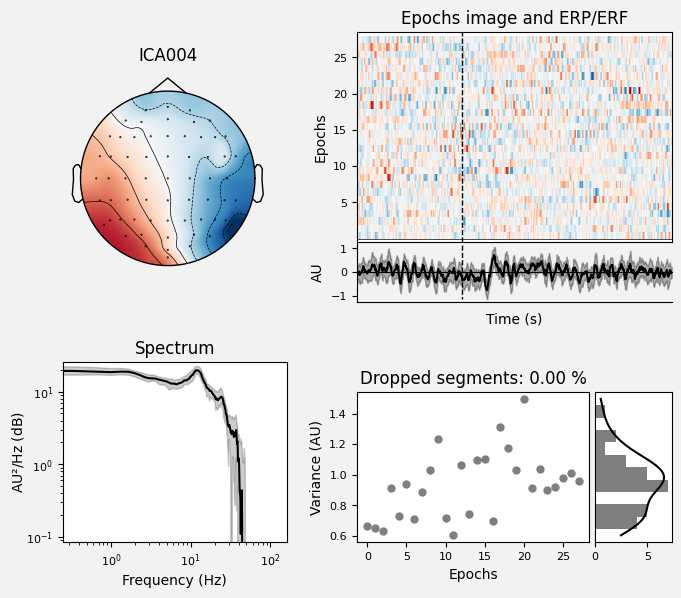

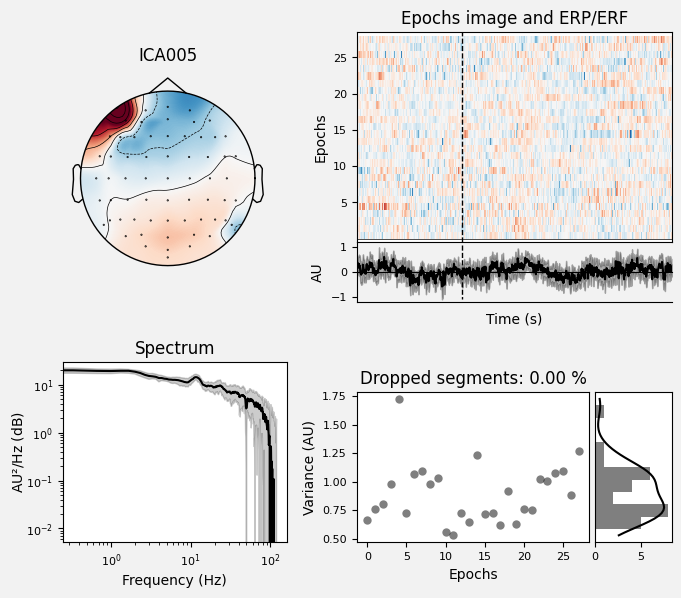

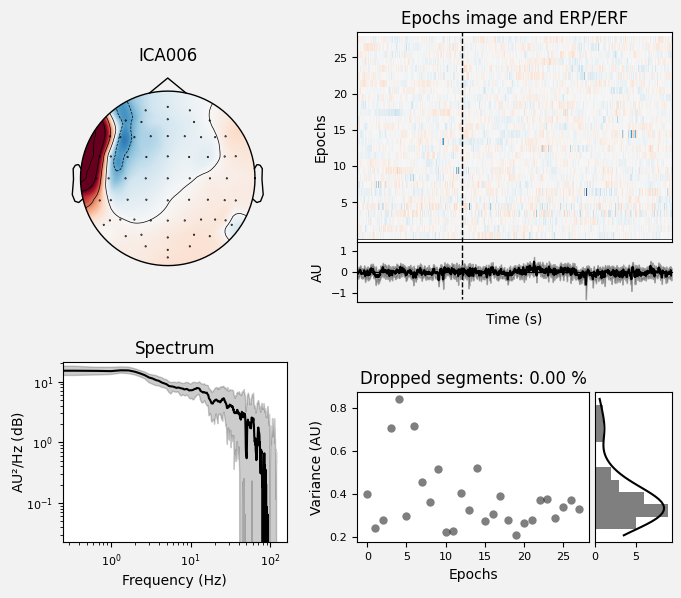

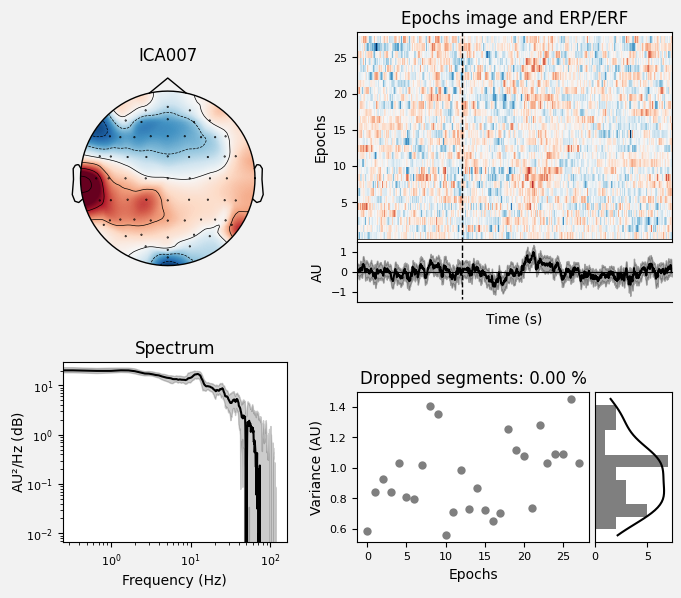

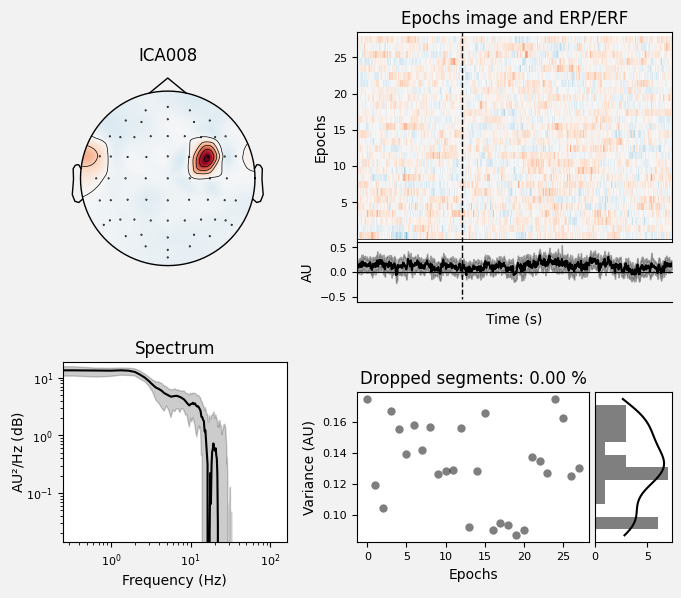

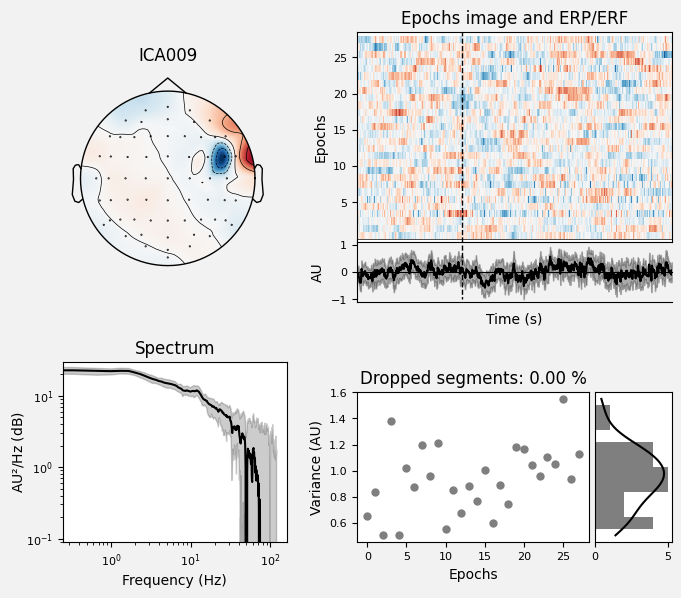

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [18]:
ica.plot_properties(
    epochs['left','right'].copy().crop(-1,2).filter(1,120, verbose=False), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = True,
    psd_args = dict(fmax=120))

In [19]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['r_pinch'],
    ch_name=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8'], 
    measure='zscore',
    threshold=1.3)


Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG6, EXG8


In [20]:
eog_indices


[1, 0, 3]

In [21]:
ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_6316\1950003828.py:1: RuntimeWarning: More than one ECG channel found. Using only EXG1.
  ecg_indices, icg_scores = ica.find_bads_ecg(filtered['r_pinch'], threshold=0.25)


In [22]:
ecg_indices


[4, 2, 8, 0, 6, 5, 9, 7, 1, 3]

In [41]:
exclude = eog_indices + ecg_indices 
np.unique([0,1,2,4,5,6])

array([0, 1, 2, 5, 6])

In [23]:
ica.apply(epochs, exclude=[0,1,2,5,6,8,9])

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 7 ICA components
    Projecting back using 63 PCA components


<EpochsFIF |  62 events (all good), -2 - 7.99902 sec, baseline off, ~353.7 MB, data loaded,
 'r_pinch': 7
 'r_stop': 16
 'left': 14
 'right': 14
 'rest': 11>

ERP

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



C:\Users\Alberto\AppData\Local\Temp\ipykernel_6316\3154141180.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (3073), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 1706 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 1792 out of 1792 | elapsed:    3.2s finished


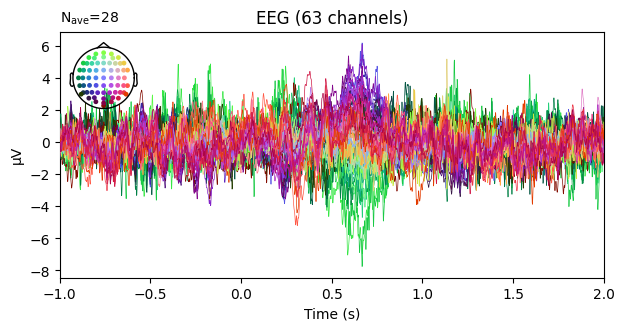

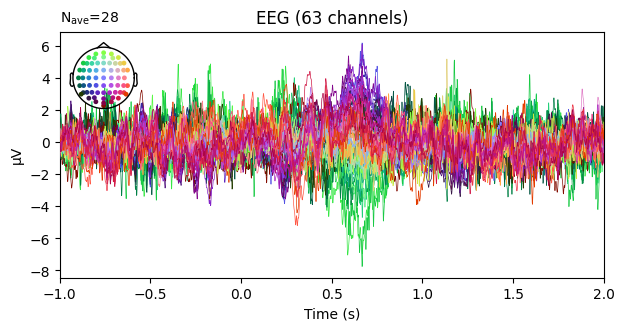

In [24]:
epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()

Setting up band-pass filter from 2 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 536 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 704 out of 704 | elapsed:    0.2s finished


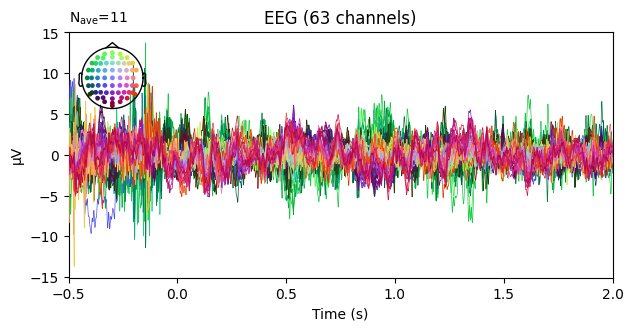

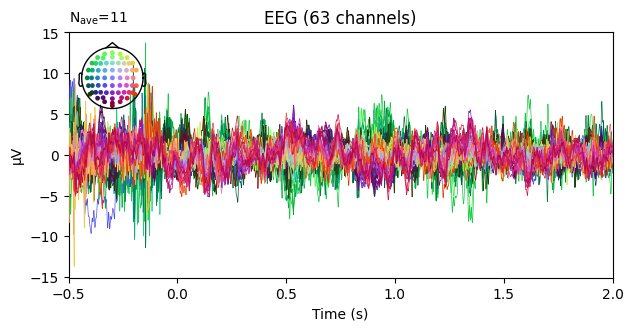

In [26]:
epochs['rest'].copy().crop(-0.5,2).filter(2,120, n_jobs=8).average().plot()

In [27]:
epochs.save('ica_epo.fif', overwrite=True)

Overwriting existing file.
